In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-in-india/Unemployment in India.csv


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [6]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [8]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

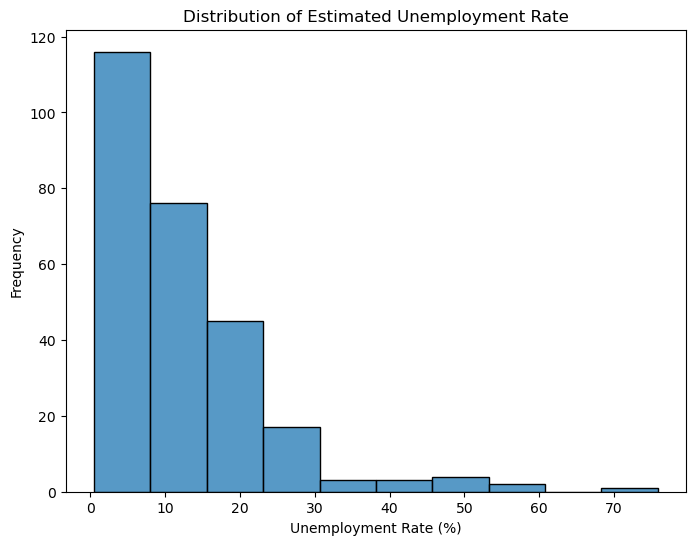

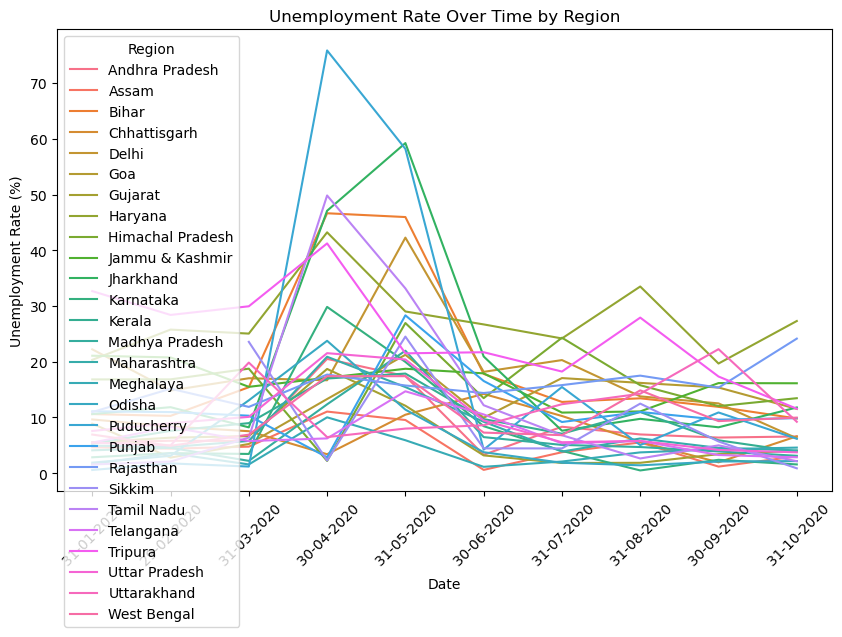

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the estimated unemployment rate
plt.figure(figsize=(8, 6))
sns.histplot(df[' Estimated Unemployment Rate (%)'], bins=10)
plt.title('Distribution of Estimated Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Line plot of unemployment rate over time by region
plt.figure(figsize=(10, 6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region', data=df)
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [17]:
import scipy.stats as stats

# Calculate the mean unemployment rate by region
mean_unemployment_by_region = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
print(mean_unemployment_by_region)

# Perform a t-test between two regions
region1 = df[df['Region'] == 'Region 1'][' Estimated Unemployment Rate (%)']
region2 = df[df['Region'] == 'Region 2'][' Estimated Unemployment Rate (%)']
t_statistic, p_value = stats.ttest_ind(region1, region2)
print('T-statistic:', t_statistic)
print('P-value:', p_value)

Region
Andhra Pradesh       8.664000
Assam                4.856000
Bihar               19.471000
Chhattisgarh         7.819000
Delhi               18.414000
Goa                 12.167000
Gujarat              6.376000
Haryana             27.477000
Himachal Pradesh    16.065000
Jammu & Kashmir     16.477778
Jharkhand           19.539000
Karnataka            7.668000
Kerala               9.434000
Madhya Pradesh       6.854000
Maharashtra          7.979000
Meghalaya            3.866000
Odisha               6.462000
Puducherry          17.942000
Punjab              11.981000
Rajasthan           15.868000
Sikkim               9.792500
Tamil Nadu          12.187000
Telangana            6.833000
Tripura             25.055000
Uttar Pradesh        9.737000
Uttarakhand         11.156000
West Bengal         10.192000
Name:  Estimated Unemployment Rate (%), dtype: float64
T-statistic: nan
P-value: nan


In [18]:
df["Region"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [19]:
df.groupby("Region").size()

Region
Andhra Pradesh      10
Assam               10
Bihar               10
Chhattisgarh        10
Delhi               10
Goa                 10
Gujarat             10
Haryana             10
Himachal Pradesh    10
Jammu & Kashmir      9
Jharkhand           10
Karnataka           10
Kerala              10
Madhya Pradesh      10
Maharashtra         10
Meghalaya           10
Odisha              10
Puducherry          10
Punjab              10
Rajasthan           10
Sikkim               8
Tamil Nadu          10
Telangana           10
Tripura             10
Uttar Pradesh       10
Uttarakhand         10
West Bengal         10
dtype: int64

In [32]:
df = df.rename(columns={df.columns[0]:'State',df.columns[3]:'EUR',df.columns[4]:'EE', df.columns[5]:'ELPR', df.columns[6]:'Region'})
df.head(10)

,State,Date,Frequency,EUR,EE,ELPR,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


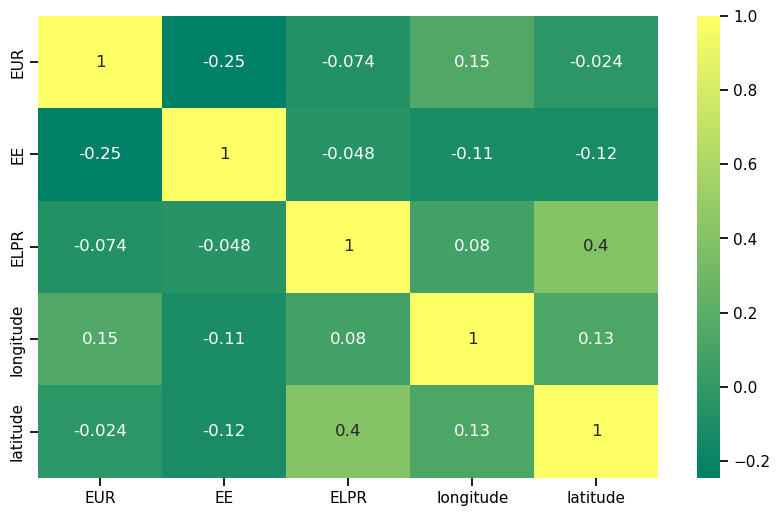

In [33]:
heat_maps = df[['EUR','EE', 'ELPR', 'longitude', 'latitude']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

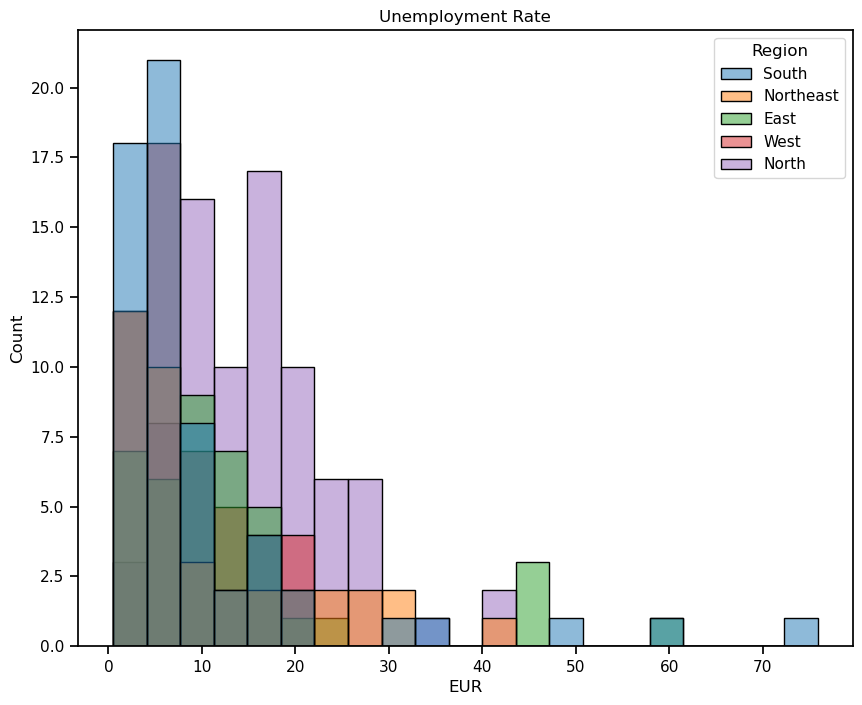

In [26]:
#unemployment rate according to different regions of India
df.columns= ["State","Date","Frequency","EUR","EE","ELPR","Region","longitude","latitude"]

plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="EUR", hue="Region", data=df)
plt.show()

In [28]:
import plotly.express as px

In [29]:
region = df.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [31]:
unemployment = df[["State", "Region", "EUR"]]

fig = px.sunburst(unemployment, path=['Region','State'], values='EUR',
                  title= 'Unemployment rate in every State and Region', height=650)
fig.show()